# Violin Plot

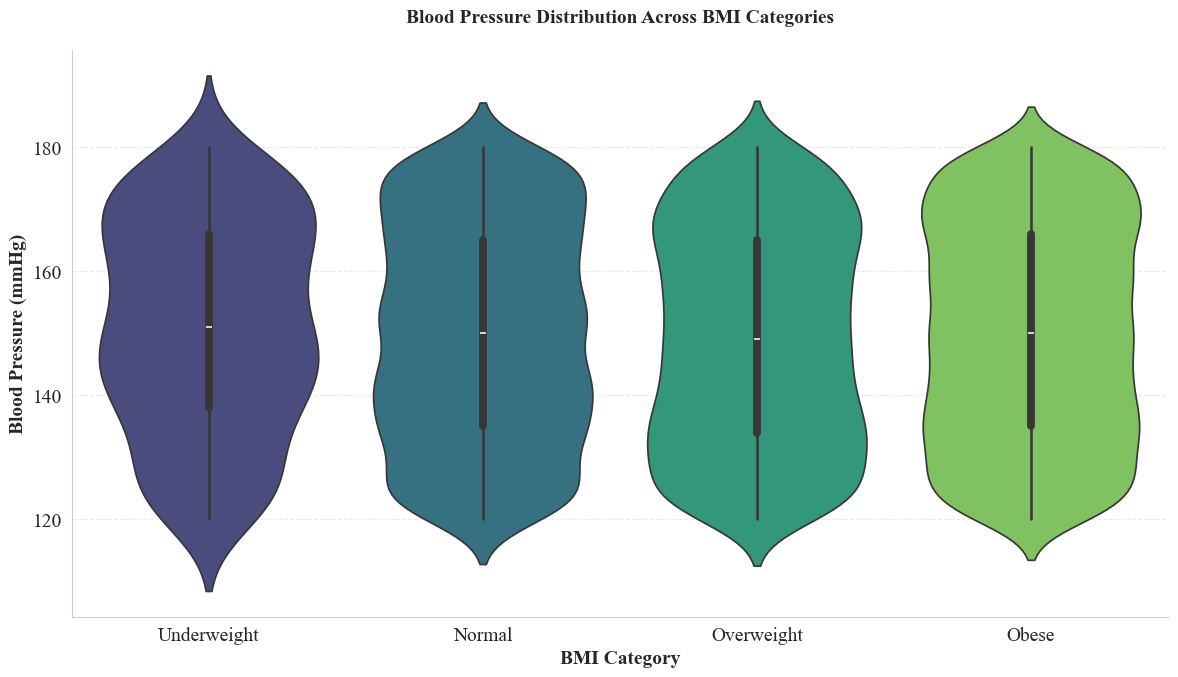

In [23]:
# Import libraries
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
rcParams['axes.titlepad'] = 20  

# Load data
df = pd.read_csv('heart_disease.csv')

# Create BMI categories using standard thresholds
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI Category'] = df['BMI'].apply(categorize_bmi)

# Filter out rows with missing blood pressure data
df = df.dropna(subset=['Blood Pressure'])

# Create violin plot
plt.figure(figsize=(12, 7))
violin = sns.violinplot(
    x='BMI Category',
    y='Blood Pressure',
    data=df,
    palette='viridis',
    order=['Underweight', 'Normal', 'Overweight', 'Obese']
)

# Set uniform font styling for all elements
title = plt.title('Blood Pressure Distribution Across BMI Categories', 
                 fontsize=14, fontweight='bold')
plt.xlabel('BMI Category', fontsize=14, fontweight='bold')
plt.ylabel('Blood Pressure (mmHg)', fontsize=14, fontweight='bold')

# Adjust tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Customize grid and spines
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine()

# Ensure all text elements use Times New Roman
for item in ([title, violin.xaxis.label, violin.yaxis.label] + 
             violin.get_xticklabels() + violin.get_yticklabels()):
    item.set_fontfamily('Times New Roman')
    item.set_fontsize(14)

plt.tight_layout()
plt.show()

## Detailed Explanations 


# 3D Scatterplot

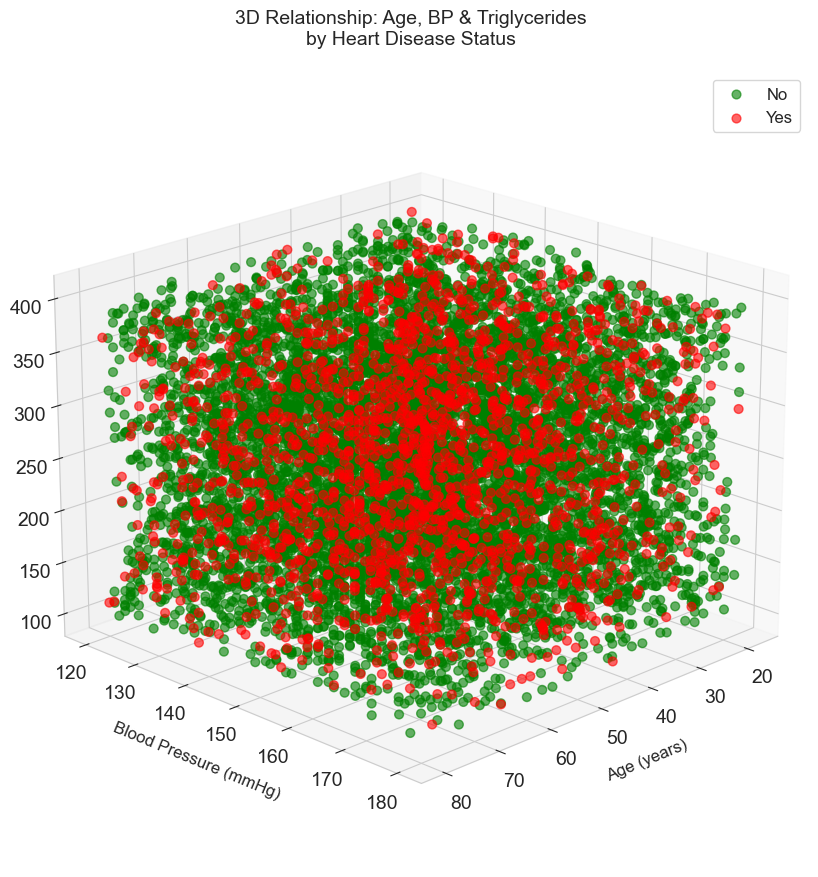

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
df = pd.read_csv('heart_disease.csv').dropna(subset=['Age', 'Blood Pressure', 'Triglyceride Level'])

# Create figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot by heart disease status
for status, color in [('No', 'green'), ('Yes', 'red')]:
    subset = df[df['Heart Disease Status'] == status]
    ax.scatter(
        subset['Age'],
        subset['Blood Pressure'],
        subset['Triglyceride Level'],
        c=color,
        label=status,
        alpha=0.6,
        s=40
    )

# Formatting
ax.set_xlabel('Age (years)', fontsize=12, labelpad=10)
ax.set_ylabel('Blood Pressure (mmHg)', fontsize=12, labelpad=10)
ax.set_zlabel('Triglycerides (mg/dL)', fontsize=12, labelpad=10)
ax.set_title('3D Relationship: Age, BP & Triglycerides\nby Heart Disease Status', 
             fontsize=14, pad=20)
ax.legend(fontsize=12)
ax.grid(True)

# Rotate for better view
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

## Detailed Explanations


# Pie Chart 

<Figure size 1000x600 with 0 Axes>

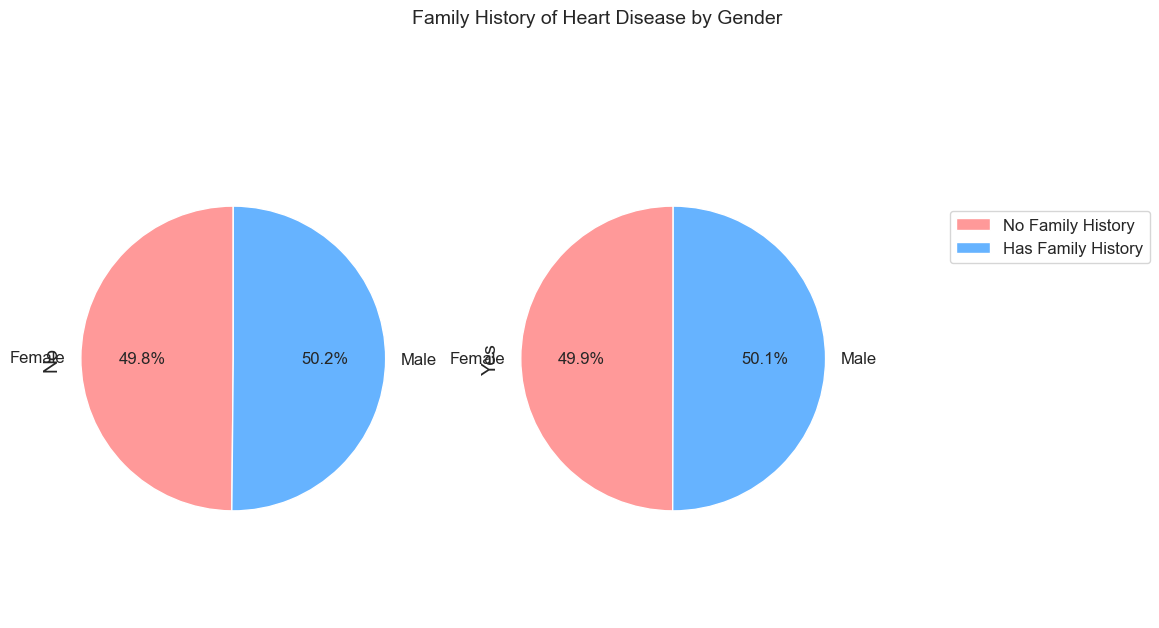

In [27]:
# Prepare data
family_history = df.groupby(['Gender', 'Family Heart Disease']).size().unstack()

# Plot
plt.figure(figsize=(10, 6))
family_history.plot(
    kind='pie',
    subplots=True,
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff'],
    textprops={'fontsize': 12},
    legend=False,
    startangle=90
)

# Formatting
plt.suptitle('Family History of Heart Disease by Gender', 
             fontsize=14, y=1.05)
plt.axis('equal')

# Custom legend
plt.legend(
    ['No Family History', 'Has Family History'],
    bbox_to_anchor=(1.3, 0.8),
    fontsize=12
)

plt.tight_layout()
plt.show()

## Detailed Explanations
